# Credit Card Transaction Fraud Detection

## Problem Statement
With the growth of e-commerce websites, people and financial companies rely on online services to carry out their transactions that have led to an exponential increase in the credit card frauds. Fraudulent credit card transactions lead to a loss of huge amount of money. The design of an effective fraud detection system is necessary in order to reduce the losses incurred by the customers and financial companies.

**In this sense, in this project, we develop a Machine learning model(XGBoost) to detect credit card transaction fraud and implement it as a web service.**

### **Credit Card Fraud**

Credit card transaction is a syntetic financial dataset created using a simulator called PaySim. In this sense, PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

This dataset contain:
  - 6362620 observations
  - 11 variables (included the target variable) 


###  **Install and import libraries**

In [1]:
# !pip install imbalanced-learn
# !pip install missingno
# !pip install hyperopt
# !pip install xgboost --upgrade

In [2]:
#import libraries
import os
import joblib
import zipfile
import warnings
warnings.simplefilter(action = "ignore")

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

import numpy as np
import pandas as pd
import scipy
import plotly.express as px

from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import missingno as msno
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### **Get the Data**

In [3]:
# # Connect with google dirve
# from google.colab import drive
# drive.mount("/content/drive")

In [4]:
# ## Unzipfile
# filepath = "/content/drive/MyDrive/Fraud_detection/Fraud_detection.zip"
# with zipfile.ZipFile(filepath, "r") as file:
#   file.extractall("/tmp")

### **Exploratory data analysis(EDA)**

- Structure
- Quality
- Content
- Patters

#### Structure
- General dimension of the dataset
- types of variables

In [82]:
# import file and get basic information
df = pd.read_csv("onlinefraud.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOarig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [6]:
# Shape 
print(f"Data shape:{df.shape}")
df.head(4)

Data shape:(6362620, 11)


step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT   181.00   C840083671          181.0            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0

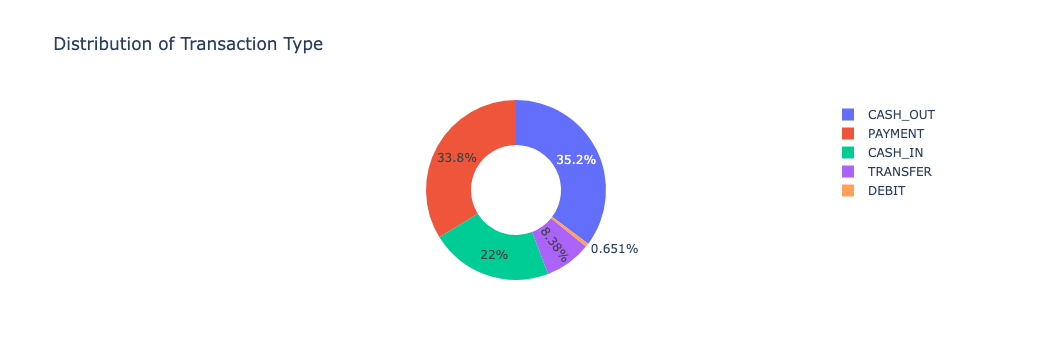

In [7]:
type_ = df["type"].value_counts()
transactions = type_.index
quantity = type_.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

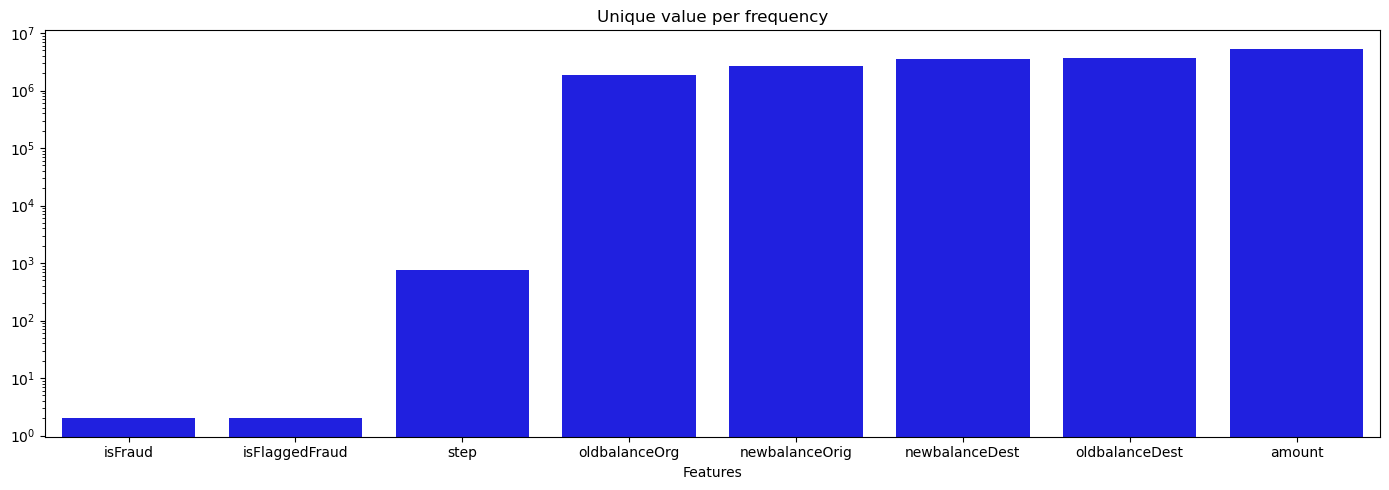

In [8]:
# Unique value - numerical variables
unique_value = df.select_dtypes("number").nunique().sort_values()

# bar Plot
fig, ax = plt.subplots(figsize = (14, 5))
sns.barplot(x = unique_value.index, y = unique_value, color = 'Blue', ax = ax)
ax.set_yscale("log")
ax.set_xlabel("Features")
ax.set_title("Unique value per frequency")
plt.tight_layout();

In [9]:
#Groupby type
df.groupby('type')['isFraud','isFlaggedFraud'].sum()

isFraud  isFlaggedFraud
type                             
CASH_IN         0               0
CASH_OUT     4116               0
DEBIT           0               0
PAYMENT         0               0
TRANSFER     4097              16

Fraud occurs only in 2 type of transactions:
TRANSFER and
CASH_OUT
- The number of fraudulent TRANSFERs = 4097
- The number of fraudulent CASH_OUTs = 4116
- The type of transactions in which isFlaggedFraud is set : TRANSFER

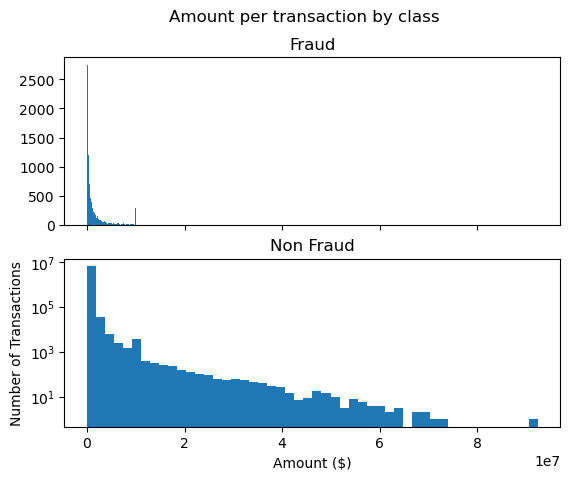

In [10]:
# Amount Vs number of transaction
fraud = df[df['isFraud']==1]
normal = df[df['isFraud']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
# plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

Less number of transaction amount in fraud comapare to non fraud data



## Quantitative Analysis

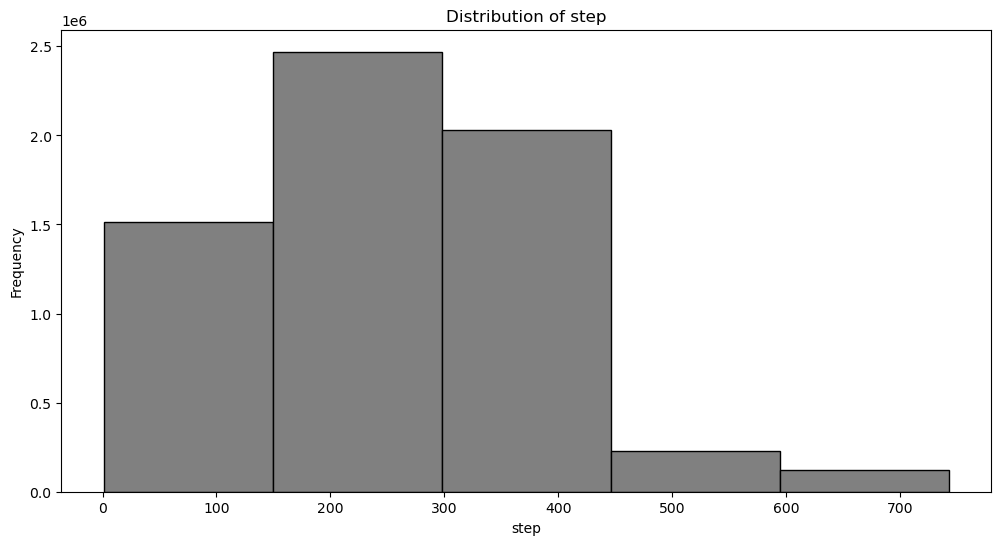

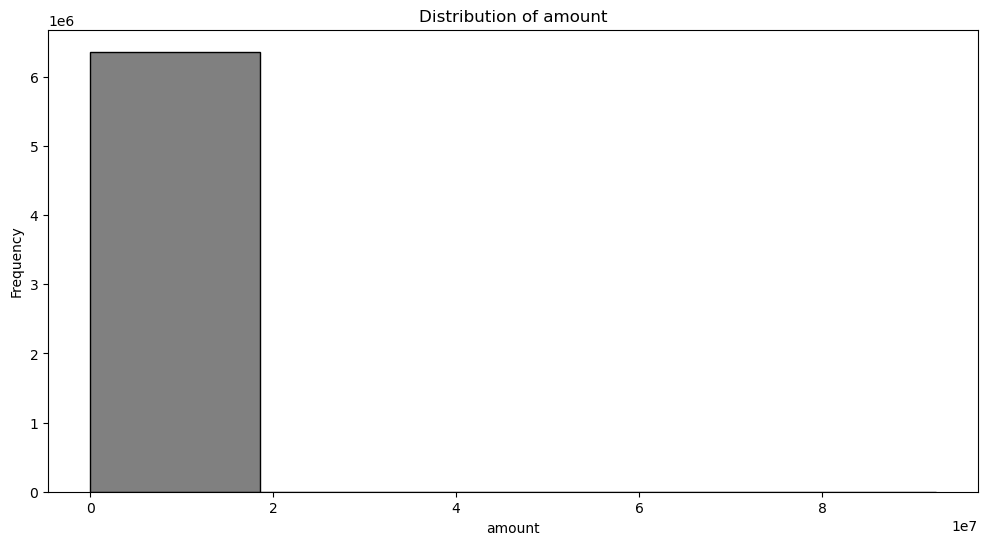

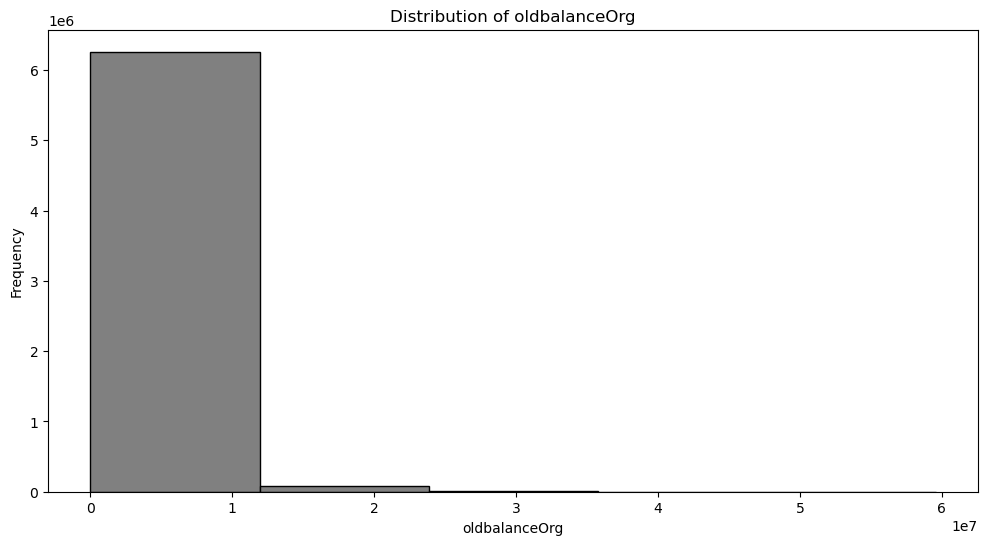

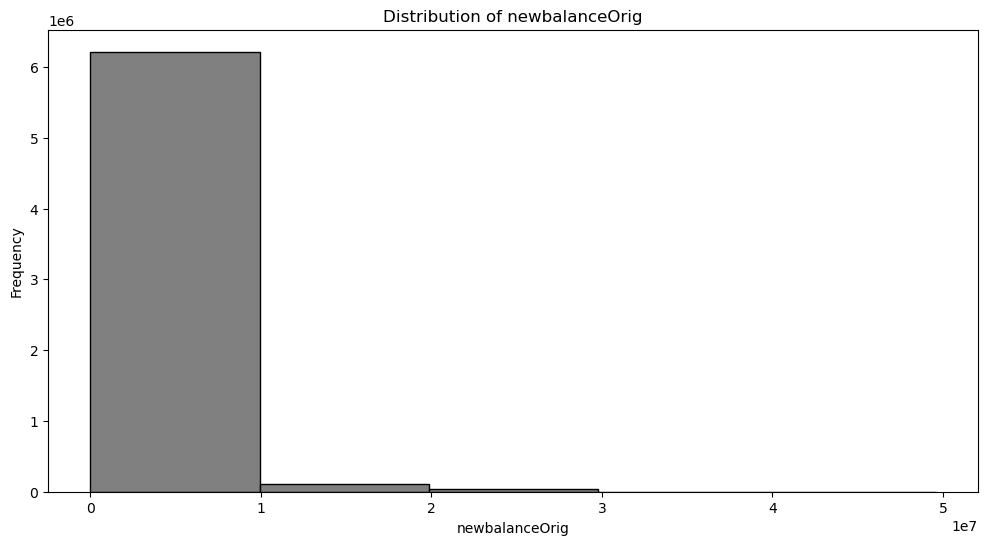

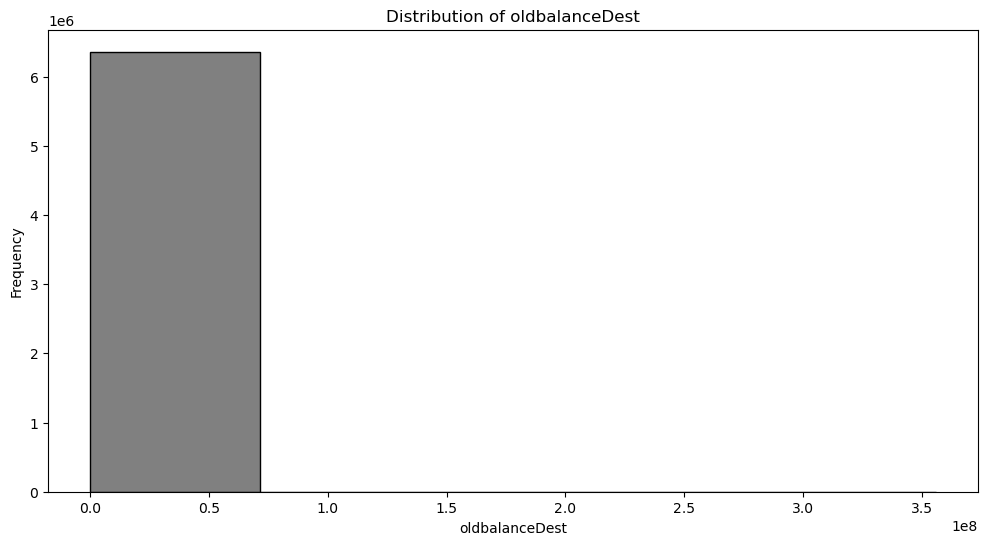

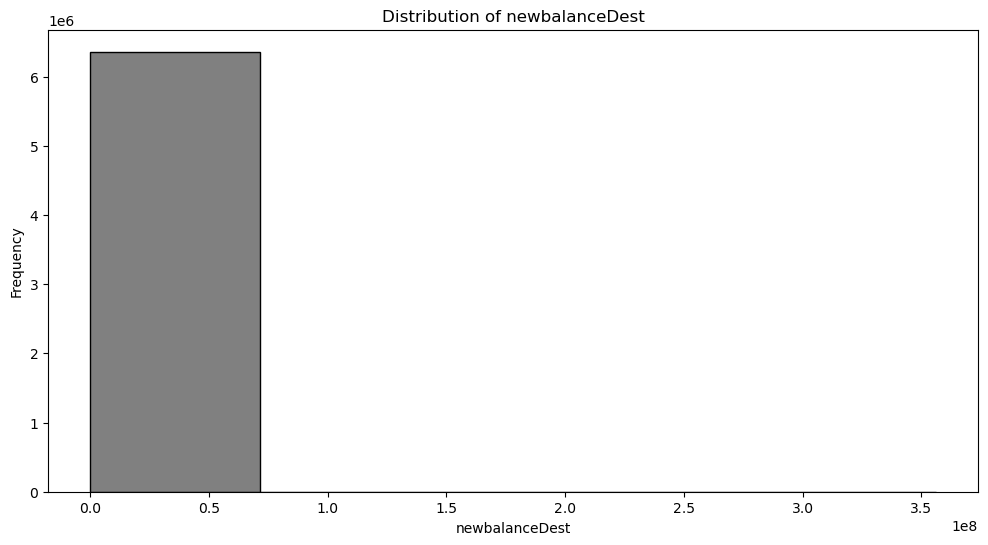

In [11]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

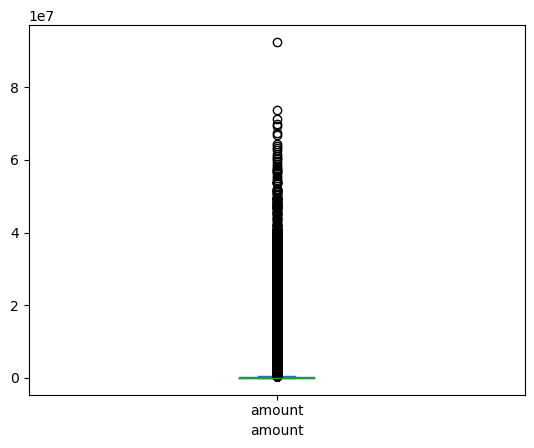

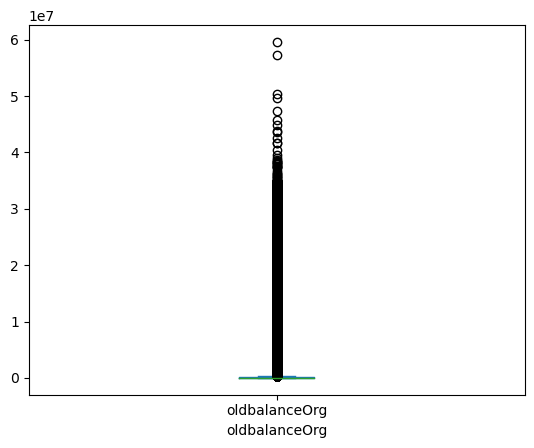

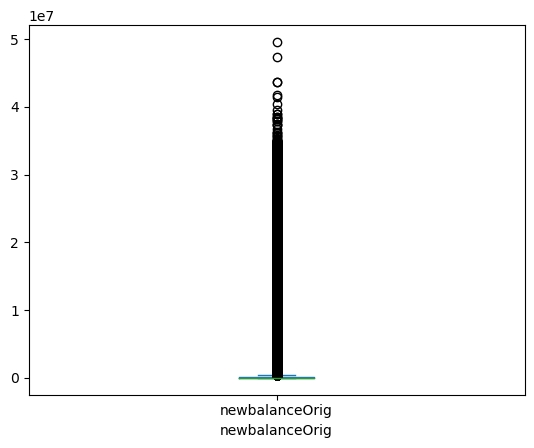

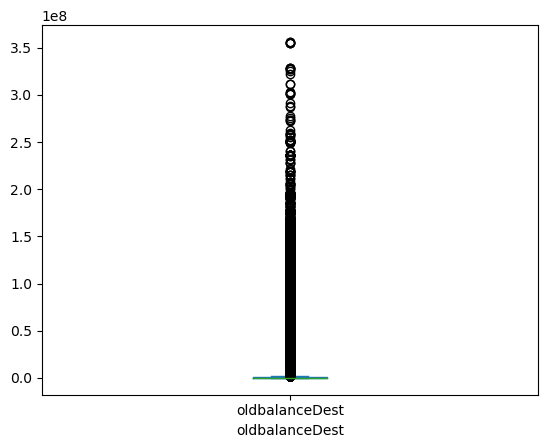

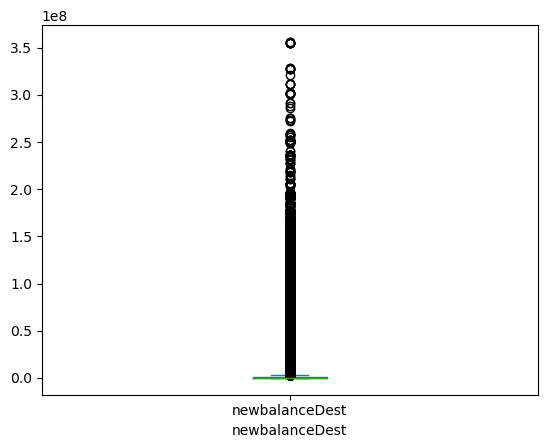

In [12]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

### Observations
Features are highly skewed except step column, there must be outliers in data

In [13]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




## Distribution after removing outliers

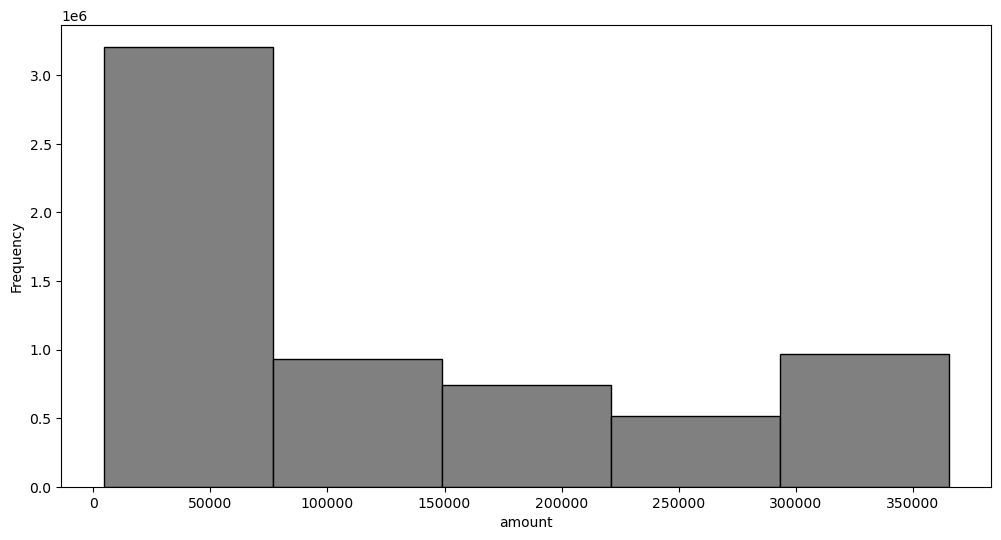

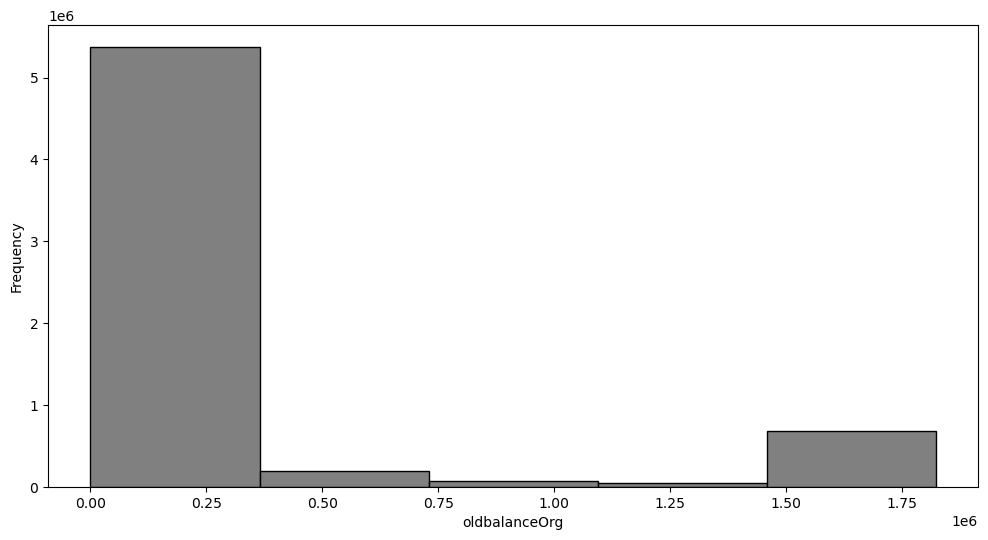

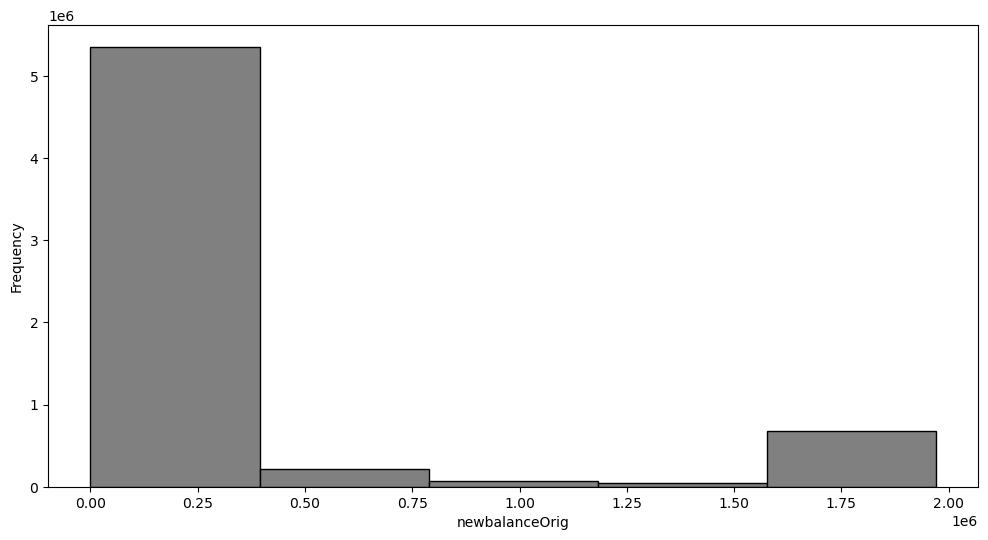

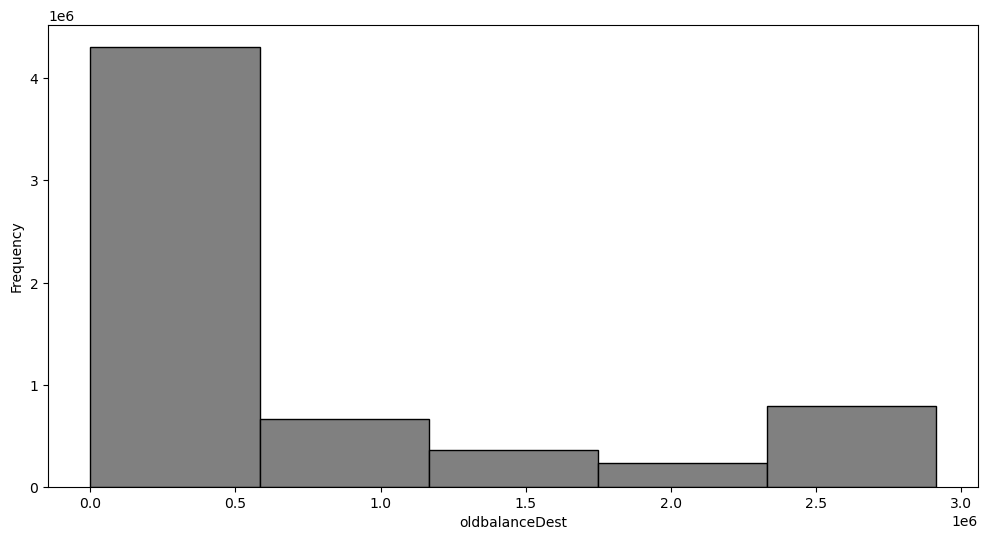

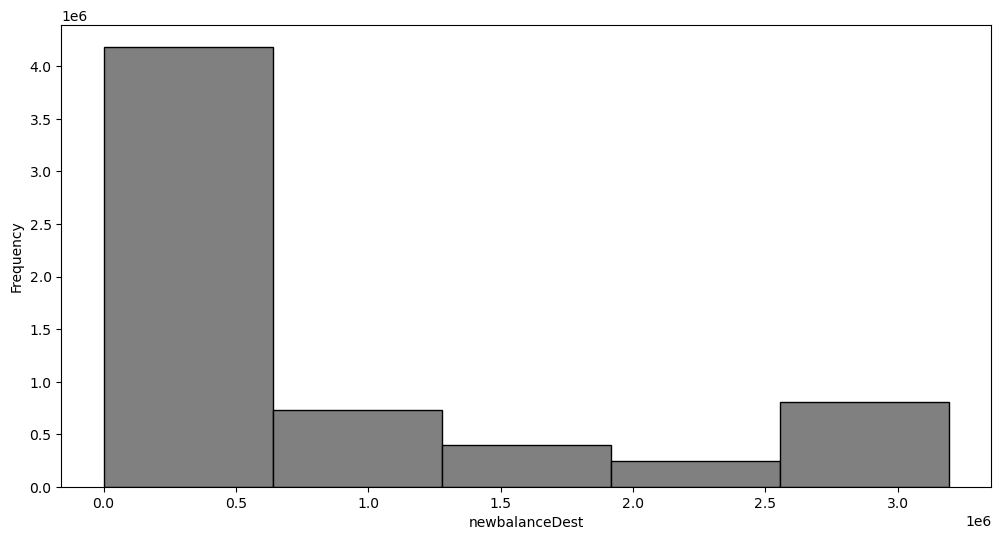

In [14]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

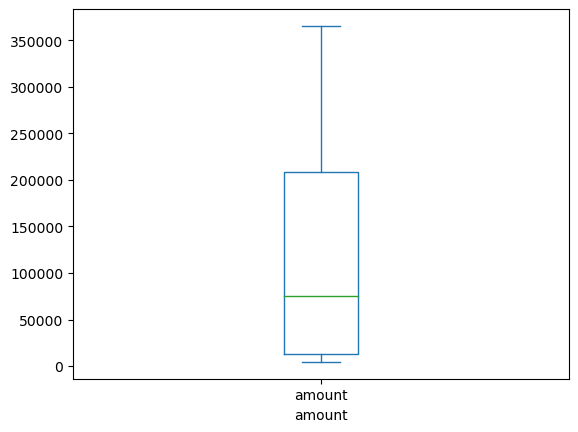

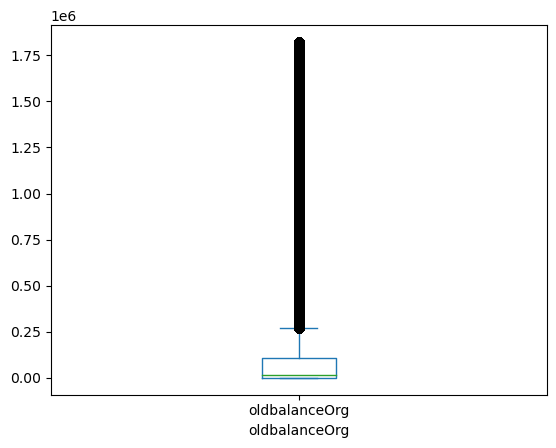

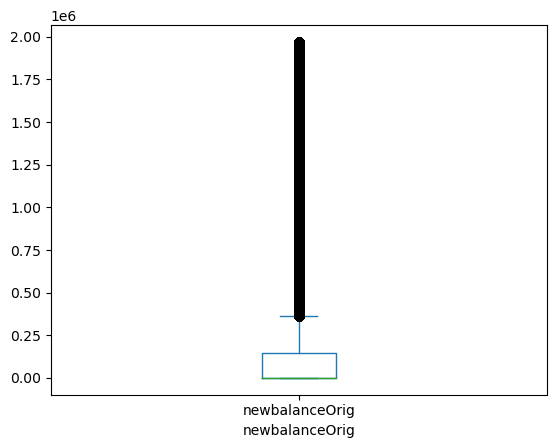

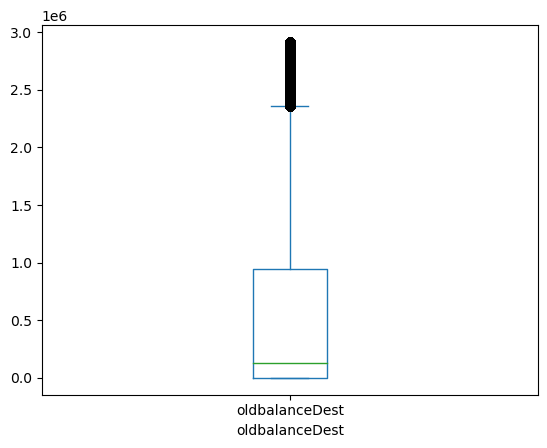

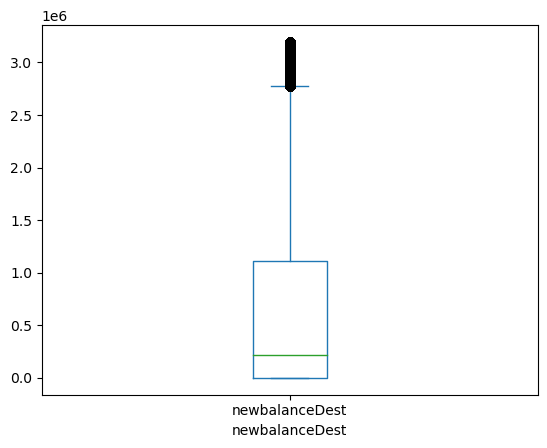

In [15]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

### Columns we'll analyze further:

* type
* amount
* nameDest
* isFraud
* isFlaggedFraud
* step

In [16]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097

(3500.0, 7000.0)

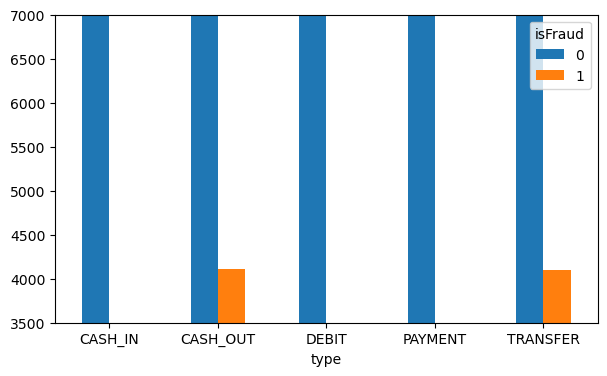

In [17]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<AxesSubplot:>

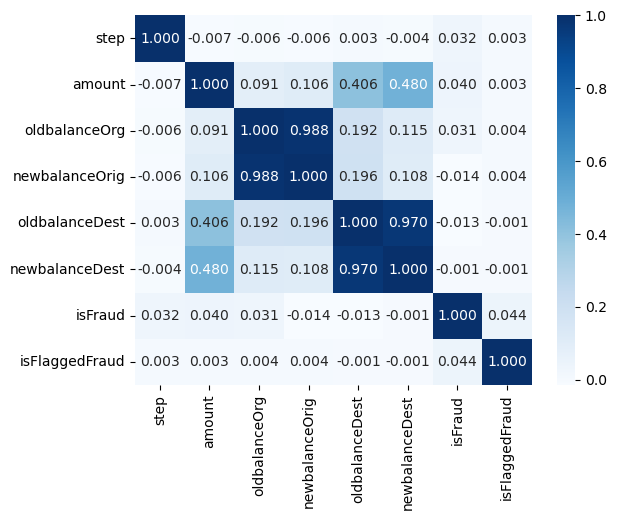

In [18]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

#### Quality
- Duplicate values
- Missing values
- outlier values

In [19]:
# Detection duplicate value
duplicate_value = df.duplicated().sum()

print(f"In this dataset there are {duplicate_value} duplicate values")

In this dataset there are 0 duplicate values


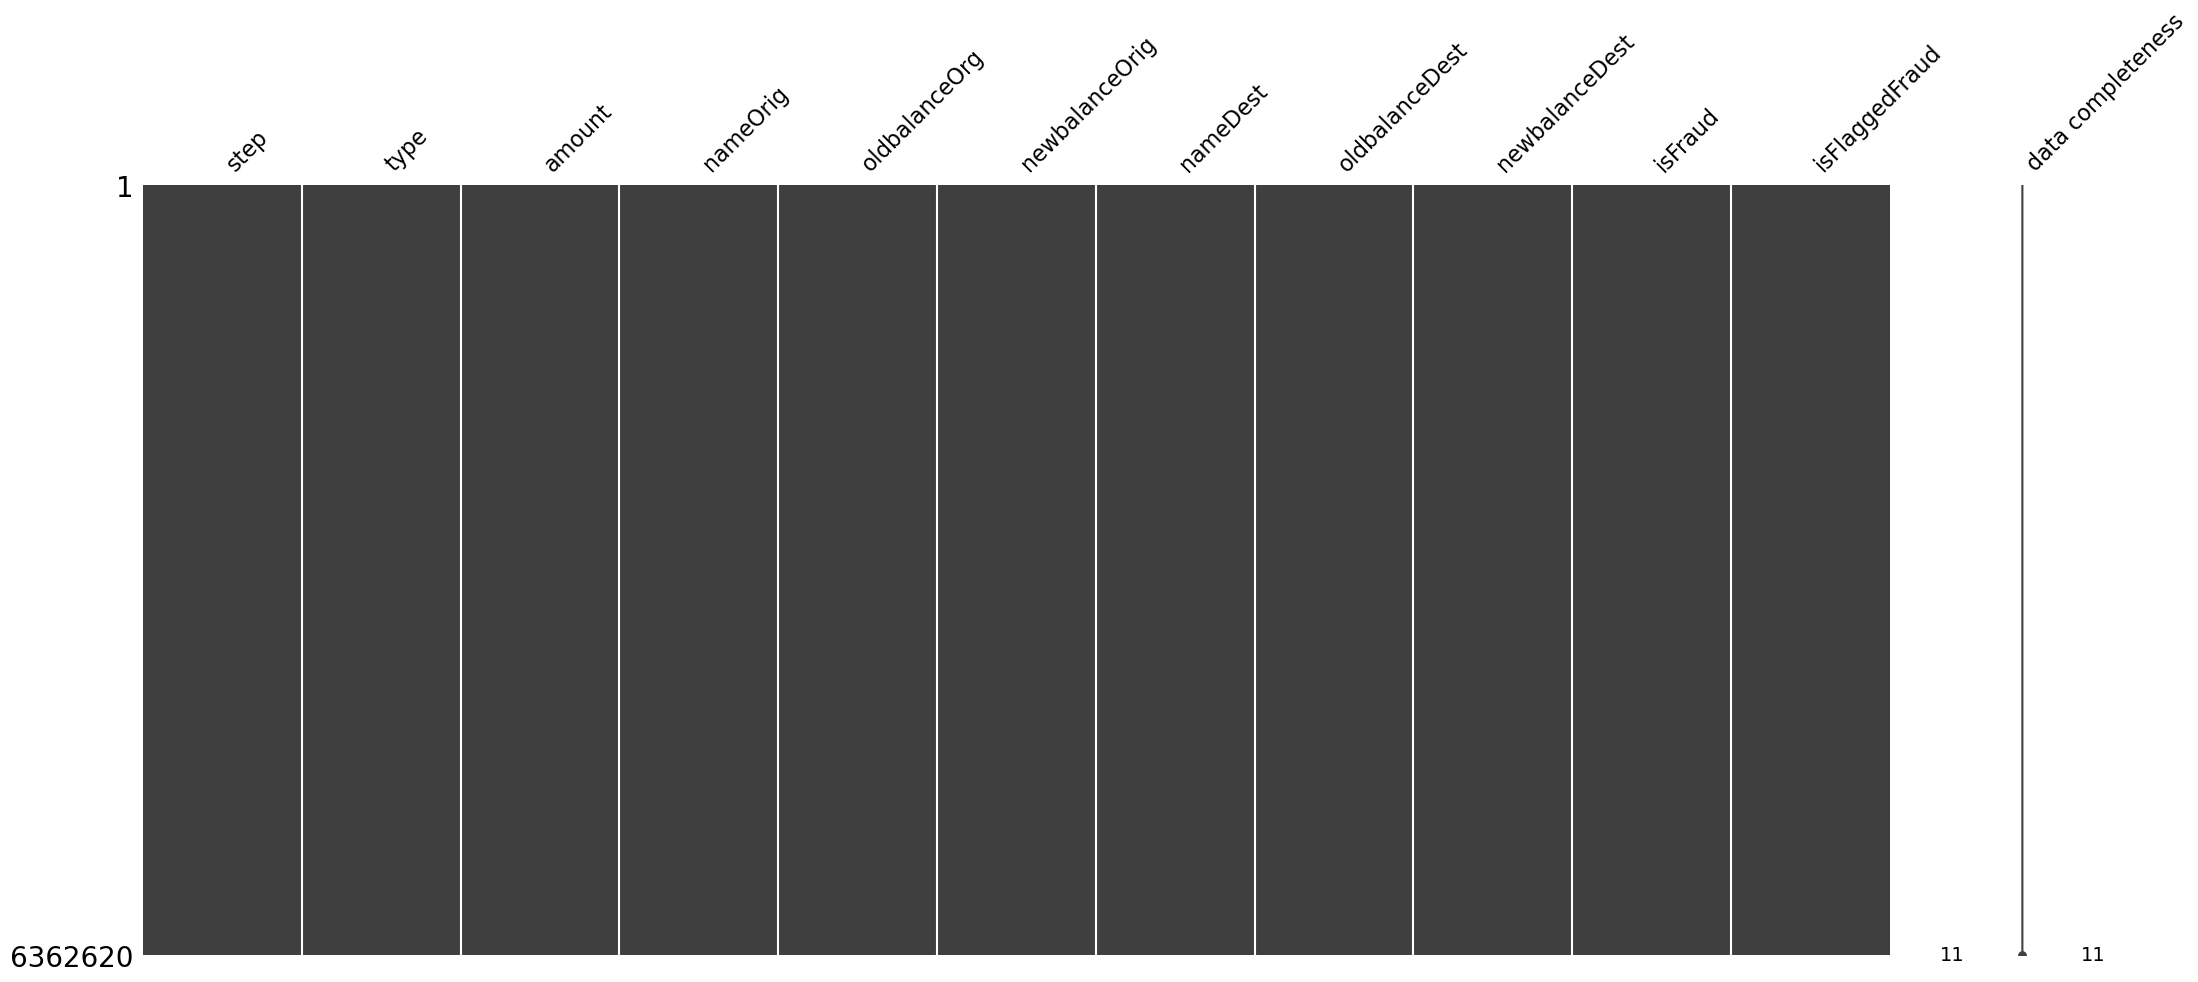

In [20]:
## Missing values by samples
msno.matrix(df, labels = True, sort = "descending");

In [21]:
## Outlier detection

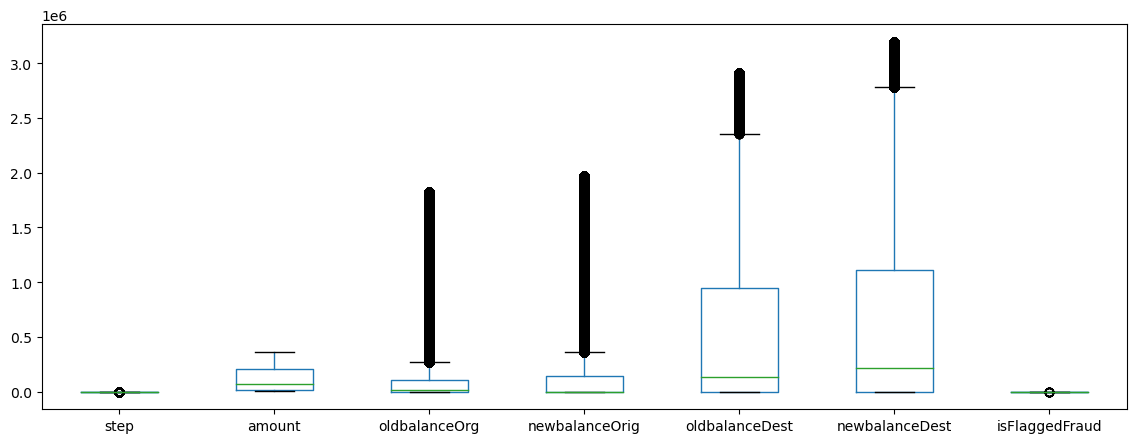

In [22]:
## Boxplot
df.drop(columns = "isFraud").boxplot(grid = False, 
                                     figsize = (14, 5),
                                     );

In [23]:
# # #Features
# features = df.select_dtypes("number").drop(columns = ["isFraud", "scores"])
# ## IsolateForest
# isolation_model = IsolationForest(
#     contamination = float(0.2),
#     random_state = np.random.seed(42),
#     n_jobs = -1
# )
# isolation_model.fit(features)

# df['scores'] = isolation_model.decision_function(features) 
# df['anomaly_score'] = isolation_model.predict(features)
# df.head(4)

# # plot of anomalies
# fig, ax = plt.subplots(figsize = (14,5))
# df['anomaly_score'].value_counts().plot(
#     kind = "bar",
#     ylabel = "Frequency",
#     title = "Anomalies frequency",
#     ax = ax
# )
# ax.set_yscale('log')
# ax.set_xticklabels(["Normal: 1","Anomaly: -1"]);

In [24]:
# Clean dataset
def filter_merchants_users(data):
    data = df[df['nameDest'].str.contains("M") == False]
    data.reset_index(drop = True, inplace = True)
    return  data

def unnecessary_var(data):
    drop_list = ['nameOrig','isFlaggedFraud', 'nameDest']
    data.drop(columns = drop_list, inplace = True)
    return data

In [84]:
## Deep copy
df_copy = df.copy(deep = True)

In [85]:
# pandas pipeline
df_m = (
    df_copy
    .pipe(filter_merchants_users)
    .pipe(unnecessary_var)
)
print(df_m.shape)
df_m.head(4)

(4211125, 8)


step      type   amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1  TRANSFER   181.00          181.0            0.00             0.0   
1     1  CASH_OUT   181.00          181.0            0.00         21182.0   
2     1     DEBIT  5337.77        41720.0        36382.23         41898.0   
3     1     DEBIT  9644.94         4465.0            0.00         10845.0   

   newbalanceDest  isFraud  
0            0.00        1  
1            0.00        1  
2        40348.79        0  
3       157982.12        0

#### Content
- Summary statistic (numerical and categorical vaaibles)
- Variable distributions
- Skew and kurtosis

In [27]:
## summary statistic (numerical variables)
df_m.describe().T

count          mean           std     min        25%  \
step            4211125.0  2.428961e+02  1.421435e+02     1.0     155.00   
amount          4211125.0  1.782676e+05  1.185258e+05  4501.3   76085.56   
oldbalanceOrg   4211125.0  3.563884e+05  6.622553e+05     0.0       0.00   
newbalanceOrig  4211125.0  3.909515e+05  7.180899e+05     0.0       0.00   
oldbalanceDest  4211125.0  1.000621e+06  1.045372e+06     0.0  139659.05   
newbalanceDest  4211125.0  1.147948e+06  1.127714e+06     0.0  221717.59   
isFraud         4211125.0  1.950310e-03  4.411924e-02     0.0       0.00   
isFlaggedFraud  4211125.0  3.799460e-06  1.949217e-03     0.0       0.00   

                      50%         75%          max  
step               237.00      334.00      743.000  
amount          158943.21   278485.01   365423.309  
oldbalanceOrg    18155.00   191127.82  1822508.289  
newbalanceOrig       0.00   284954.41  1970344.793  
oldbalanceDest  551247.21  1692950.88  2914266.669  
newbalanceDest  683724.79  1910978.53  3194869.671  
isFraud              0.00        0.00        1.000  
isFlaggedFraud       0.00        0.00        1.000

In [28]:
# categorical variables
df_m.describe(include = "object")

type     nameOrig     nameDest
count    4211125      4211125      4211125
unique         4      4207035       571961
top     CASH_OUT  C1462946854  C1286084959
freq     2237500            3          113

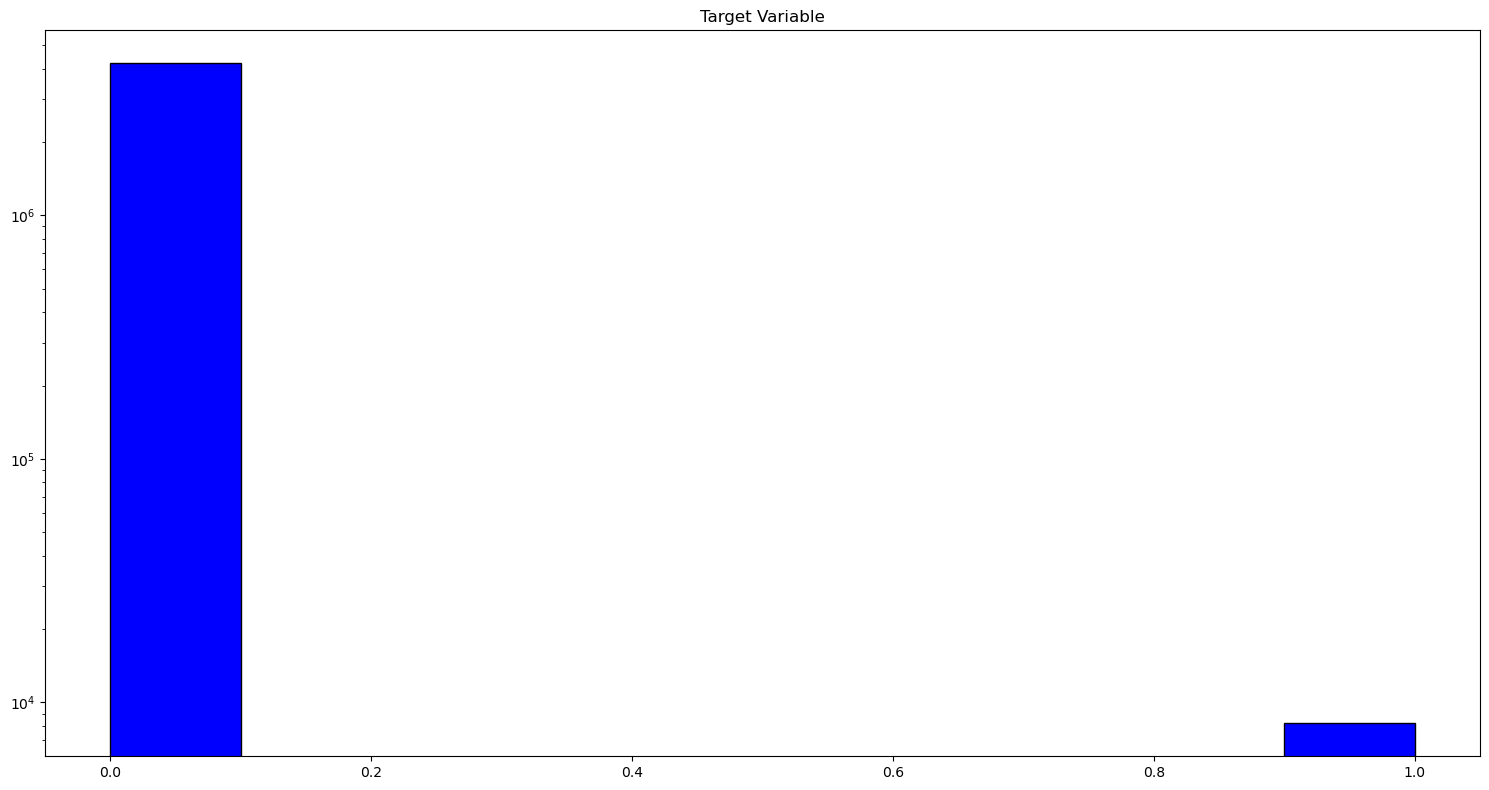

In [29]:
# Target distribution
df_m['isFraud'].hist(figsize = (15, 8),
                       color = "blue",
                       grid = False,
                       edgecolor = "black")
plt.yscale("log")
plt.title("Target Variable")
plt.tight_layout();

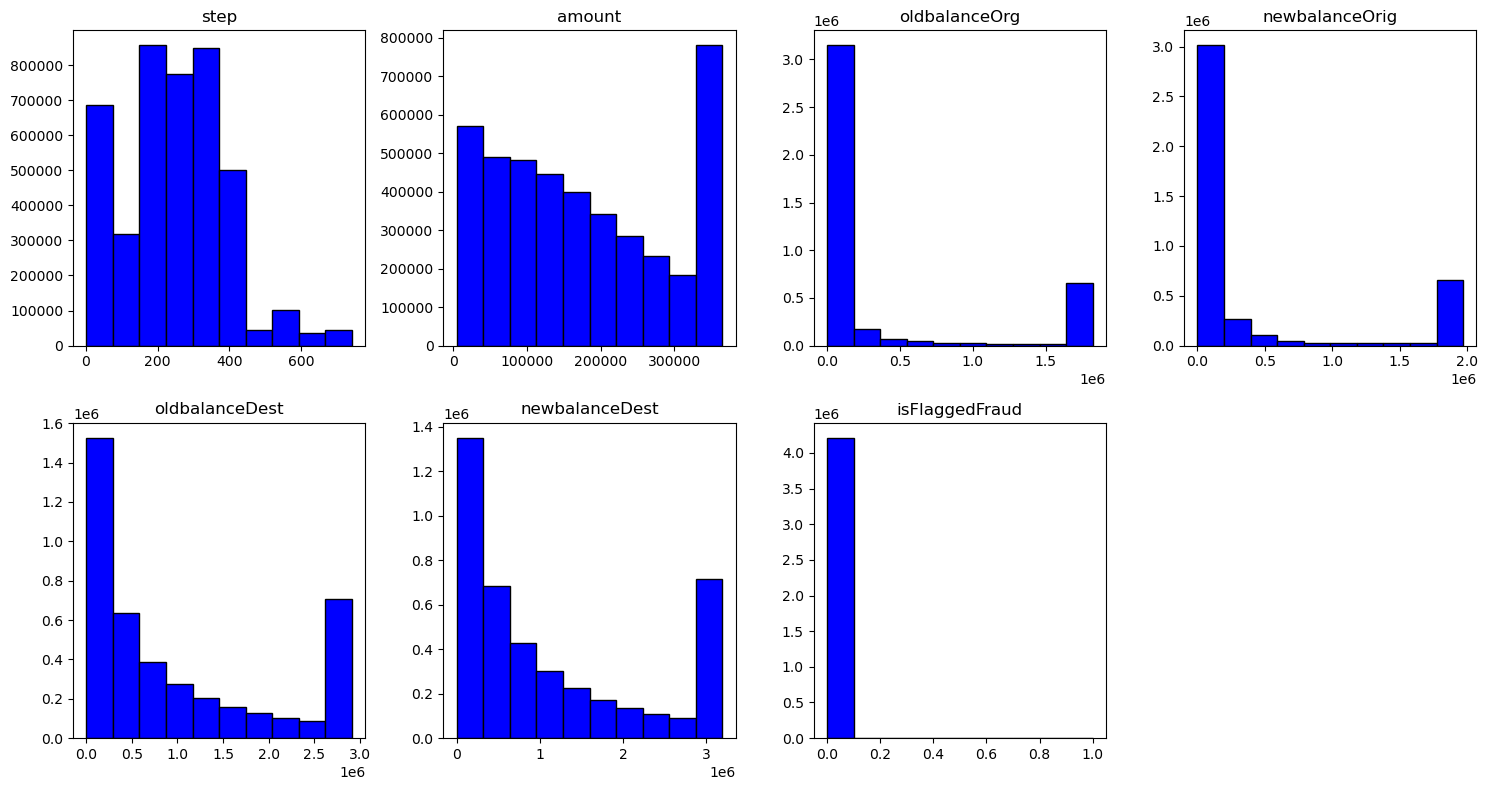

In [30]:
# Feature distributions
df_m.drop(columns = 'isFraud').hist(bins = 10,
                                      figsize = (15, 8),
                                      layout = (-1, 4),
                                      grid = False,
                                      color = "blue",
                                      edgecolor = "black",
                                      )
plt.tight_layout();

In [31]:
# Kurtosis and skew
num_features = [colm for colm in df_m.select_dtypes("number").columns if colm != "isFraud"]

for c in num_features:
    kurt = scipy.stats.mstats.kurtosis(df[c])
    Skew = scipy.stats.mstats.skew(df[c])
    
    print(f"{c} Skew: {np.round(Skew, 2)}, Kurtosis: {np.round(kurt, 2)}")

step Skew: 0.38, Kurtosis: 0.33
amount Skew: 0.8, Kurtosis: -0.74
oldbalanceOrg Skew: 2.25, Kurtosis: 3.36
newbalanceOrig Skew: 2.23, Kurtosis: 3.27
oldbalanceDest Skew: 1.42, Kurtosis: 0.57
newbalanceDest Skew: 1.36, Kurtosis: 0.43
isFlaggedFraud Skew: 630.6, Kurtosis: 397658.75


#### Patters
- Pairplots
- Correlation coefficient
 - Pearson
 - Spearman
- Boxplot (Fraud per time of transaction)
- Risk of fraud per type of pay

In [33]:
## Feature patters
feat_continues = df_m.select_dtypes("number").drop(columns = ["isFraud"])

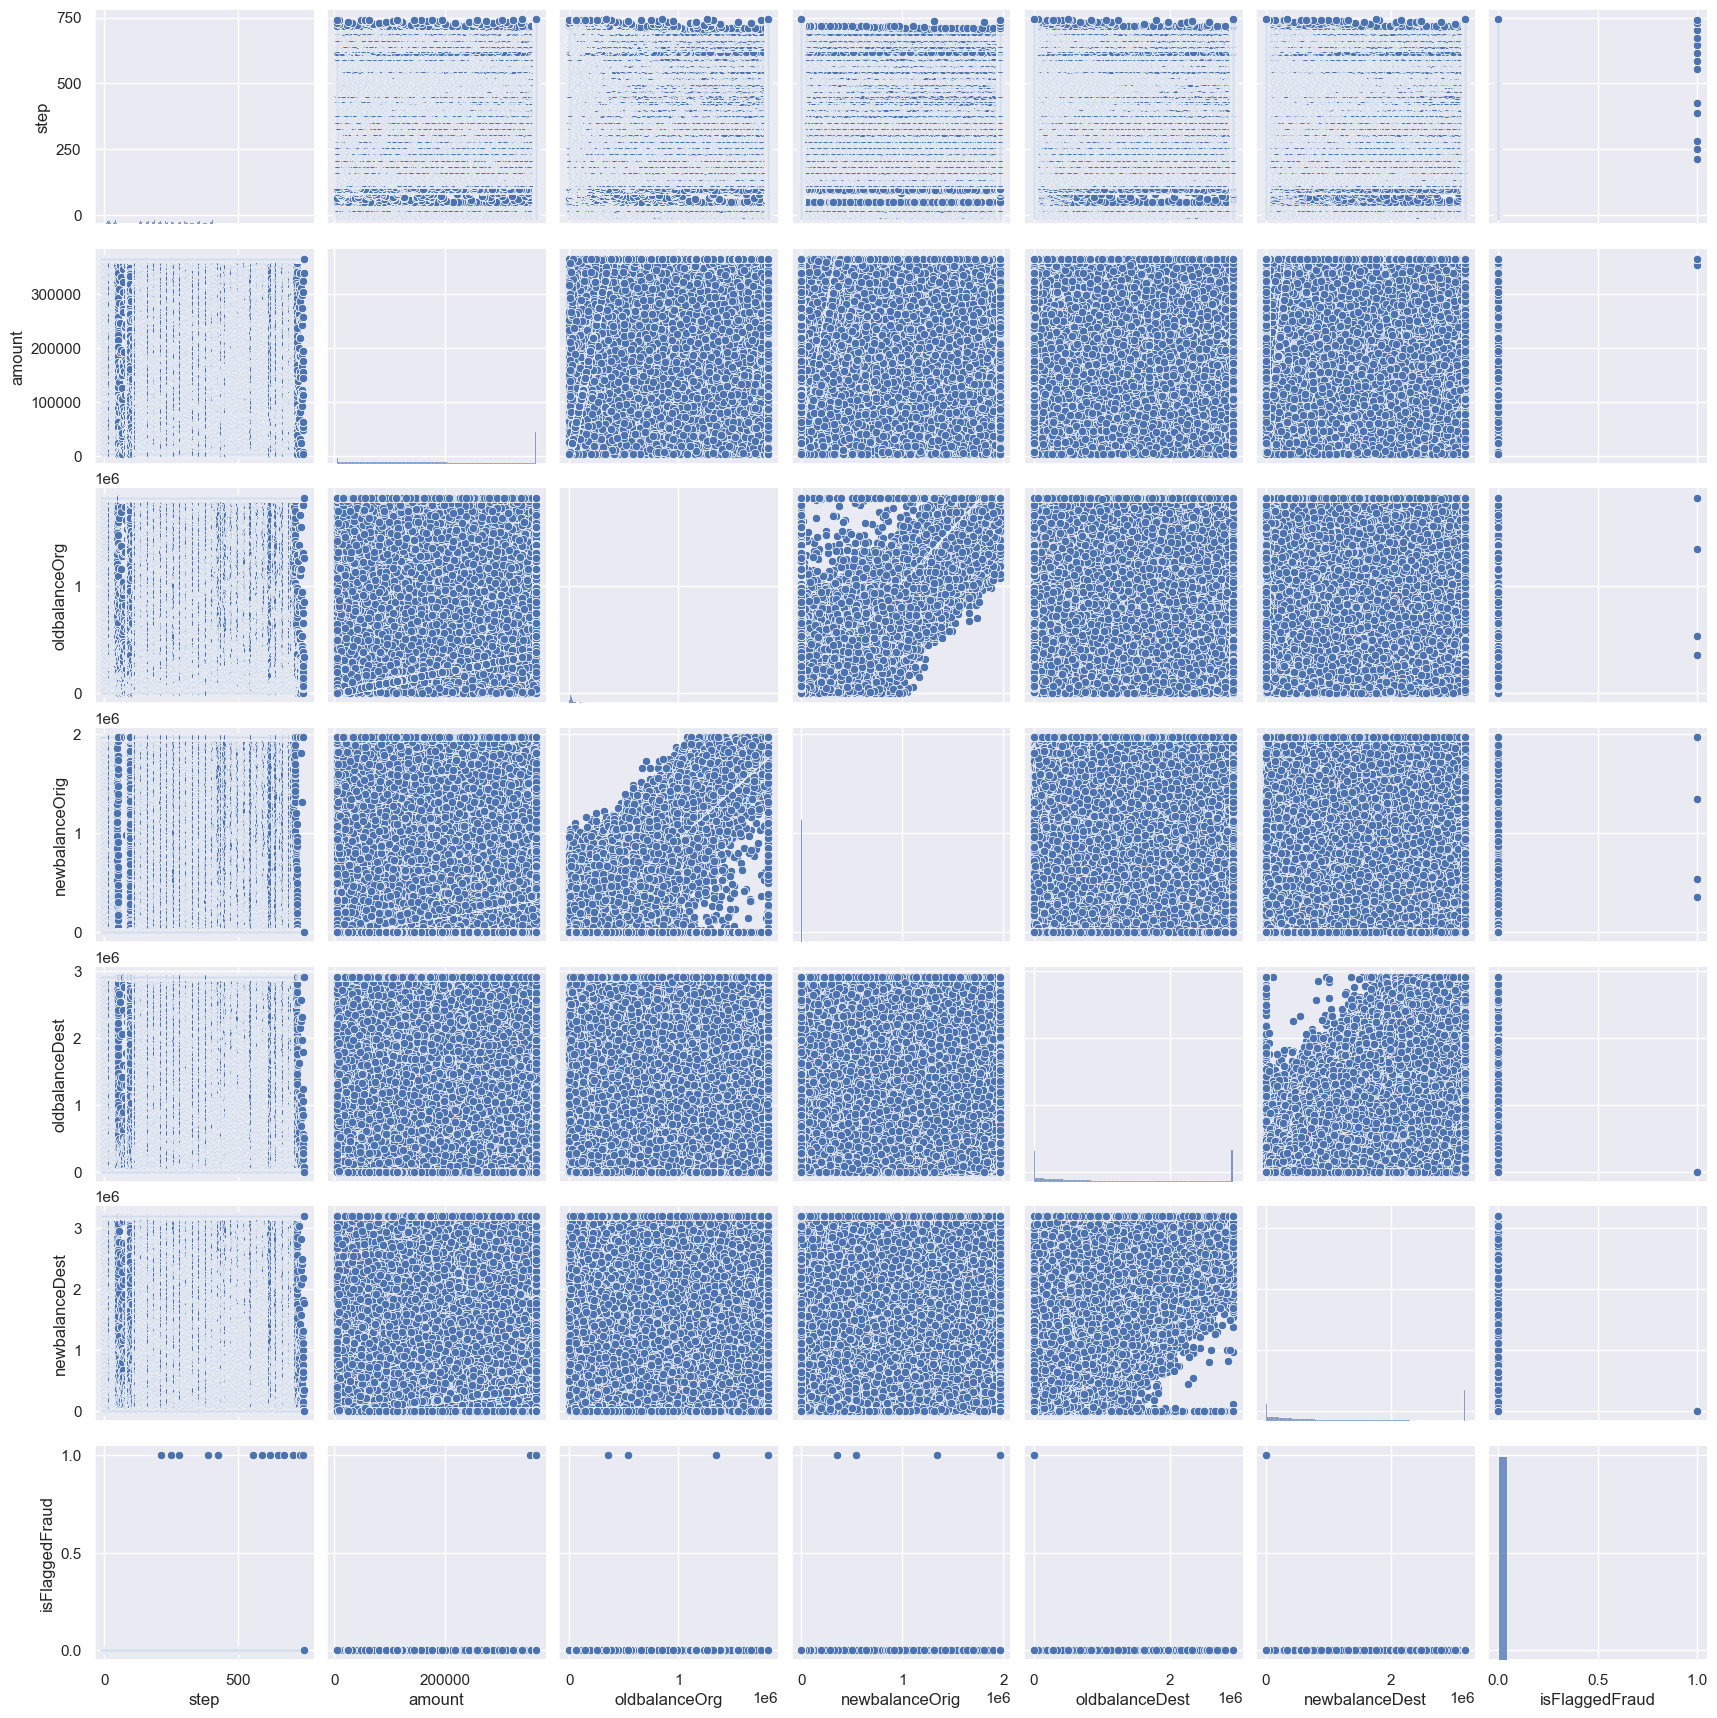

In [34]:
## pairplot
sns.set(rc={'figure.figsize':(14,8)})
sns.pairplot(feat_continues)
sns.set_context('talk')
sns.set_style('white')

In [35]:
## Correlaction (pearson and spermean)
pearson_corr = df_m.corr(method = 'pearson')
spearman_corr = df_m.corr(method = 'spearman')

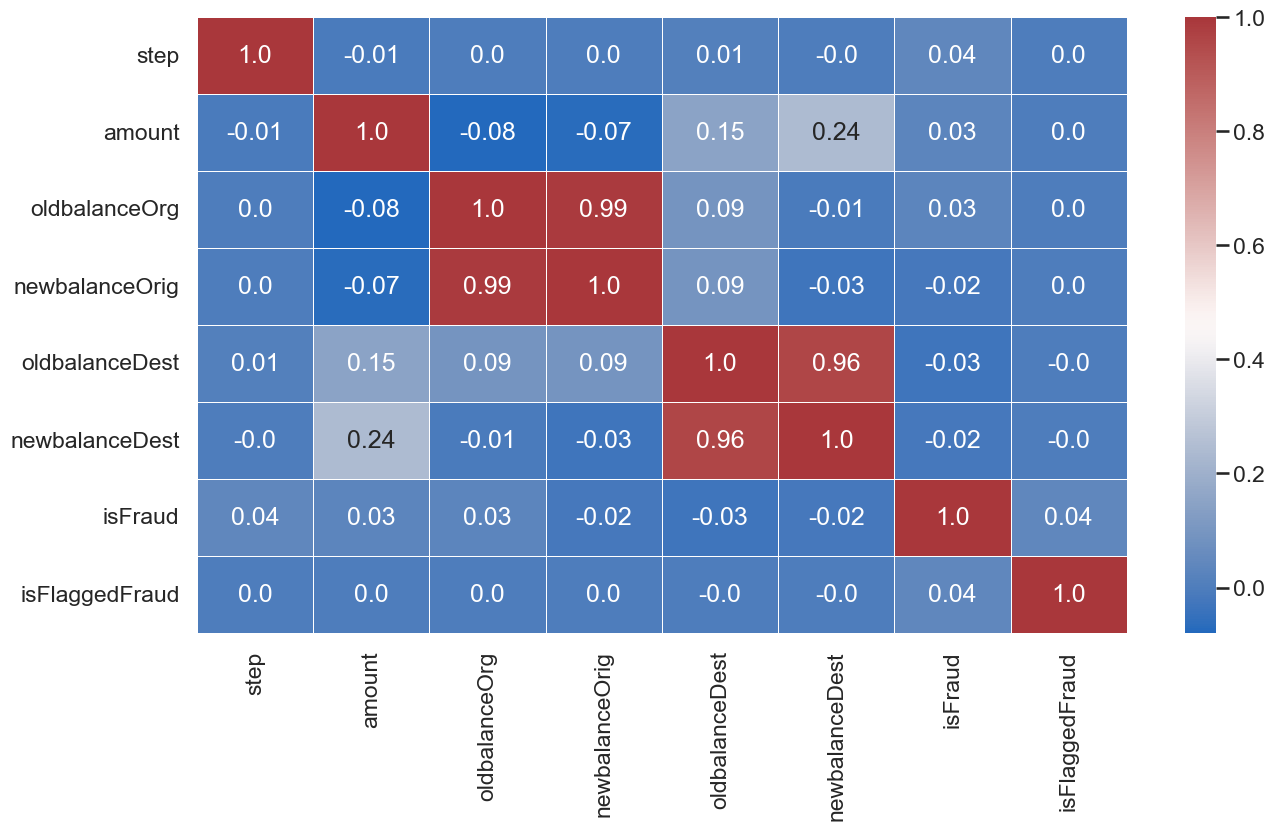

In [36]:
# Correlation plot
fig, ax = plt.subplots(figsize=(15,8))
#pearson
sns.heatmap(np.round(pearson_corr, 2),
              annot = True, fmt = "", linewidths = .5,cmap ="vlag", ax = ax
              );

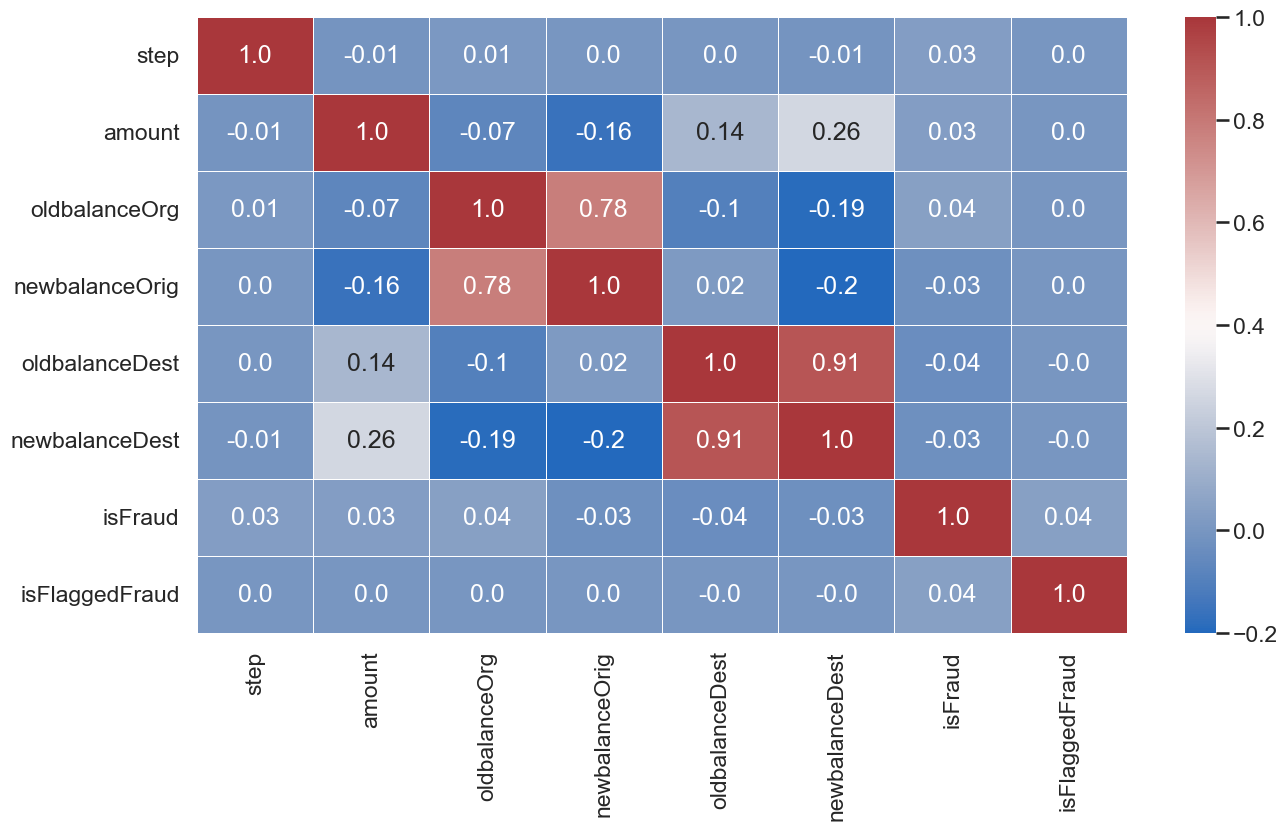

In [37]:
#spearman
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(np.round(spearman_corr, 2), square = False,
              annot = True, fmt = "", linewidths = .5,cmap ="vlag", ax = ax
              );#mask = np.eye(len(spearman_corr)),cbar_kws = {"shrink": 0.8}

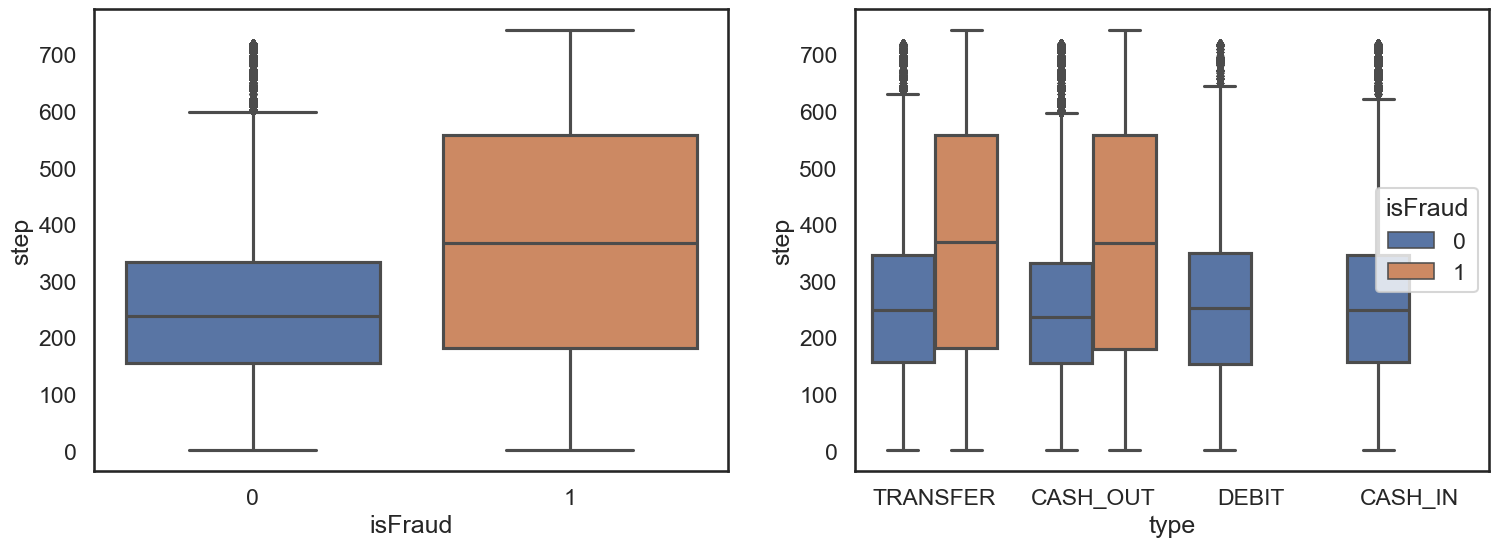

In [38]:
## Boxplot per step (time of transaction)
fig, ax = plt.subplots(1,2,figsize=(18,6))
ax.ravel()

## Fraud per amount of transactions
sns.boxplot(
    data = df_m,
    x = 'isFraud',
    y = 'step',
    ax = ax[0]
)
## type of pay
sns.boxplot(
    data = df_m,
    x = 'type',
    y = 'step',
    hue = 'isFraud',
    ax = ax[1]
);

In [39]:
from IPython.display import display
## Risk of fraud per type of pay
global_mean = df_m['isFraud'].mean()
## calculate risk
type_group = pd.DataFrame() 
type_group['mean'] = df_m.groupby('type')['isFraud'].mean()
type_group['diff'] = type_group['mean'] - global_mean
type_group['risk'] = type_group['mean'] / global_mean
display(type_group)

mean      diff      risk
type                                  
CASH_IN   0.000000 -0.001950  0.000000
CASH_OUT  0.001840 -0.000111  0.943211
DEBIT     0.000000 -0.001950  0.000000
TRANSFER  0.007688  0.005738  3.941933

### Data Preprocessing
- Transform categorical variables
- Split data into features(X) and label(y)
- Split data in train, val and test set

## Feature Engineering

In [86]:
# Now let’s transform the categorical features into numerical. Here we will also transform the values of the isFraud column into 
# No Fraud and Fraud labels to have a better understanding of the output
# Changing CASH_OUT to 1, PAYMENT to 2, CASH_IN to 3, TRANSFER to 4 and DEBIT to 5 

df_m["type"] = df_m["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
# df_m["isFraud"] = df_m["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df_m.head()

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     4     181.00          181.0            0.00             0.0   
1     1     1     181.00          181.0            0.00         21182.0   
2     1     5    5337.77        41720.0        36382.23         41898.0   
3     1     5    9644.94         4465.0            0.00         10845.0   
4     1     1  229133.94        15325.0            0.00          5083.0   

   newbalanceDest  isFraud  
0            0.00        1  
1            0.00        1  
2        40348.79        0  
3       157982.12        0  
4        51513.44        0

In [87]:

# # Merchant flag for source and dist
# df_m['OrigC']=df_m['nameOrig'].apply(lambda x: 1 if str(x).find('C')==0 else 0)
# df_m['DestC']=df_m['nameDest'].apply(lambda x: 1 if str(x).find('C')==0 else 0)

# # flag for transfer and cashout from type feature
# df_m['TRANSFER']=df_m['type'].apply(lambda x: 1 if x=='TRANSFER' else 0)
# df_m['CASH_OUT']=df_m['type'].apply(lambda x: 1 if x=='CASH_OUT' else 0)

In [88]:
# Calculating Amount error
df_m['OrigAmntErr']=(abs(df_m.oldbalanceOrg-df_m.newbalanceOrig)-df_m.amount)

In [97]:
label = 'isFraud'
X = df_m[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig", 'oldbalanceDest','newbalanceDest']]#, 'OrigAmntErr']]
y = df_m[label]

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (4211125, 7)
Labels shape: (4211125,)


In [98]:
# split the data into train, val and test set
def train_test_val_split(features, labels, split_train, split_val):

  # Split and get index
    train_idx_f, test_idx = next(split_train.split(features, labels))

    # first x and y train set
    X_train_f = features.iloc[train_idx_f]
    y_train_f = labels.iloc[train_idx_f]

    # X and y test set
    X_test = features.iloc[test_idx]
    y_test = labels.iloc[test_idx]

    # Second Split and get index
    train_idx, val_idx = next(split_val.split(X_train_f, y_train_f))

    # X and y train set (definitive)
    X_train = features.iloc[train_idx]
    y_train = labels.iloc[train_idx]

    # X and y validation set
    X_val = features.iloc[val_idx]
    y_val = labels.iloc[val_idx]

    return X_train, y_train, X_test, y_test, X_val, y_val


In [99]:
split_train = StratifiedShuffleSplit(n_splits = 1,
                                     test_size = 0.2,
                                     random_state = np.random.seed(42)
                                     )
split_val = StratifiedShuffleSplit(n_splits = 1,
                                     test_size = 0.25,
                                     random_state = np.random.seed(42)
                                     )

X_train, y_train, X_test, y_test, X_val, y_val = train_test_val_split(X, y,split_train, split_val)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape:{X_val.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2526675, 7)
X_val shape:(842225, 7)
X_test shape:(842225, 7)
y_train shape: (2526675,)
y_val shape: (842225,)
y_test shape: (842225,)


In [ ]:
# X_train, y_train = oversampling(SMOTETomek, X_train, y_train) 

# print(f"X train over shape: {X_train.shape}")
# print(f"y train over shape: {y_train.shape}")

### **Modelling**
- Base line model
 - LogisticRegression

- Models:
 - RandomForest
 - LightGBM
 - XGBoost

- Models performance with the validation set:
 - Accuracy
 - Precision
 - Recall
 - F1 Score
 - Roc-auc

- Hyperparameter tuning - Final model:
 - hyperopt- Bayesian search strategy

- Final model performance with the test set:
 - Cofusion matrix
 - Accuracy
 - F1 Score
 - Roc curve

- Final model - Feature importances


 



#### Funtion to evaluate the performance of the models 

In [100]:
#Funtion: performance of the model with the validation set
def model_performance_val(y_val, y_pre):
    #classification report
    cl_report = classification_report(y_val, y_pre)
    # scores
    scores = pd.DataFrame(
      {
       'accuracy': accuracy_score(y_val, y_pre),
       'precision': precision_score(y_val, y_pre),
       'recall': recall_score(y_val, y_pre),
       'f1-score': f1_score(y_val, y_pre),
       'roc-auc': roc_auc_score(y_val, y_pre)
      },
      index = [0]
    )

    print(cl_report)
    print(scores)

#Funtion: performance of the model with the validation set
def model_performance_test(y_test, y_pred, y_pred_pro):
    ## Accuracy and roc_auc score
    print(f"Accuracy: {accuracy_score(y_test, y_pred)} \nRoc_Auc score: {roc_auc_score(y_test, y_pred)}\nF1-score: {f1_score(y_test, y_pred)}")

    ## Roc curve
    fpr, tpr, thr = roc_curve(y_test, y_pred_pro[:,1])

    ## define the figure and its size
    plt.figure(figsize =(15,5))
    layout = (1,2)

    # Axis
    cmd = plt.subplot2grid(layout,(0,0))
    rc = plt.subplot2grid(layout,(0,1))

    # Conision Matrix plot 
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = cmd)
    cmd.xaxis.set_ticklabels(["Not fraud:0", "Fraud:1"])
    cmd.yaxis.set_ticklabels(["Not fraud:0", "Fraud:1"])

    # Roc-Auc Curve plot
    rc.plot(fpr, tpr, color ='blue', linewidth = 5)
    rc.plot([0, 1],[0, 1], ls = '--', color = 'red', lw = .4)
    rc.set(xlabel = 'False Positive Rate',
       ylabel = 'True Positive Rate',
       xlim =[-.01, 1.01], ylim =[-.01, 1.01],
       title = 'ROC curve')
    plt.show()

#### Baseline model
LogisticRegression:
 - Logistic regression is a linear method, whose prediction are transformed using a logistic function(or sigmoid), etimating the probability that a intance belongs to a particular class.

In [47]:
## Training the logisticregresion
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [48]:
## Baseline performance
bs_pred = lgr_model.predict(X_val)

model_performance_val(y_val, bs_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    841256
           1       0.82      0.38      0.52       969

    accuracy                           1.00    842225
   macro avg       0.91      0.69      0.76    842225
weighted avg       1.00      1.00      1.00    842225

   accuracy  precision    recall  f1-score   roc-auc
0   0.99919   0.821029  0.378741  0.518362  0.689323


#### Random Forest model

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [49]:
brf_model = RandomForestClassifier(random_state = np.random.seed(42), class_weight= "balanced", n_jobs = -1)
brf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [50]:
## Basic randomforest model performance
brf_pred = brf_model.predict(X_val)

model_performance_val(y_val, brf_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    841256
           1       0.81      0.85      0.83       969

    accuracy                           1.00    842225
   macro avg       0.90      0.92      0.91    842225
weighted avg       1.00      1.00      1.00    842225

   accuracy  precision    recall  f1-score   roc-auc
0  0.999594   0.807655  0.849329  0.827968  0.924548


## XGBoost Model

In [93]:
# ## Setting class_post_weight parameter
scale_pos_weight = y_test.value_counts()[0] // y_test.value_counts()[1]

In [101]:
#model
bxgb_model = xgb.XGBClassifier(seed = np.random.seed(42))

bxgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [102]:
## model performance
bxgb_pred = bxgb_model.predict(X_val)

model_performance_val(y_val, bxgb_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    841256
           1       0.97      0.81      0.88       969

    accuracy                           1.00    842225
   macro avg       0.99      0.90      0.94    842225
weighted avg       1.00      1.00      1.00    842225

   accuracy  precision    recall  f1-score   roc-auc
0  0.999753   0.971499  0.809082  0.882883  0.904527


#### **Observations**
- Xgboost was the model with the better performance with the validation set:
  - Accuracy: 0.99
  - F1-Score: 0.89
  - ROC-AUC: 0.91

### **Final Model - XGBoost**

In [103]:
### Train final model
final_model = bxgb_model

In [104]:
X_test

step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1410263   183     3  159770.32      920542.95      1080313.27       302353.49   
2936287   322     3    1406.02    10945888.45     10947294.47       168277.51   
2558665   283     4  361665.43      203642.00            0.00            0.00   
2862979   308     1  146904.49       31078.00            0.00       201287.28   
1163985   161     3   89441.50     2107352.19      2196793.69      4427488.51   
...       ...   ...        ...            ...             ...             ...   
2647174   298     1  105525.85           0.00            0.00       219515.75   
2456297   277     3   73067.60     6936647.49      7009715.09      3900531.14   
2893914   309     1  184442.82           0.00            0.00       521311.64   
4018123   514     1   75661.31           0.00            0.00      4897495.63   
894717    137     3  303814.00       25900.00       329714.00        96039.81   

         newbalanceDest  
1410263       142583.17  
2936287       166871.48  
2558665       361665.43  
2862979       348191.77  
1163985      4338047.00  
...                 ...  
2647174       325041.60  
2456297      3827463.53  
2893914       705754.46  
4018123      4973156.94  
894717             0.00  

[842225 rows x 7 columns]

In [105]:
## Predictions 
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)

Accuracy: 0.999624803348274 
Roc_Auc score: 0.9972062722451305
F1-score: 0.8941018766756033


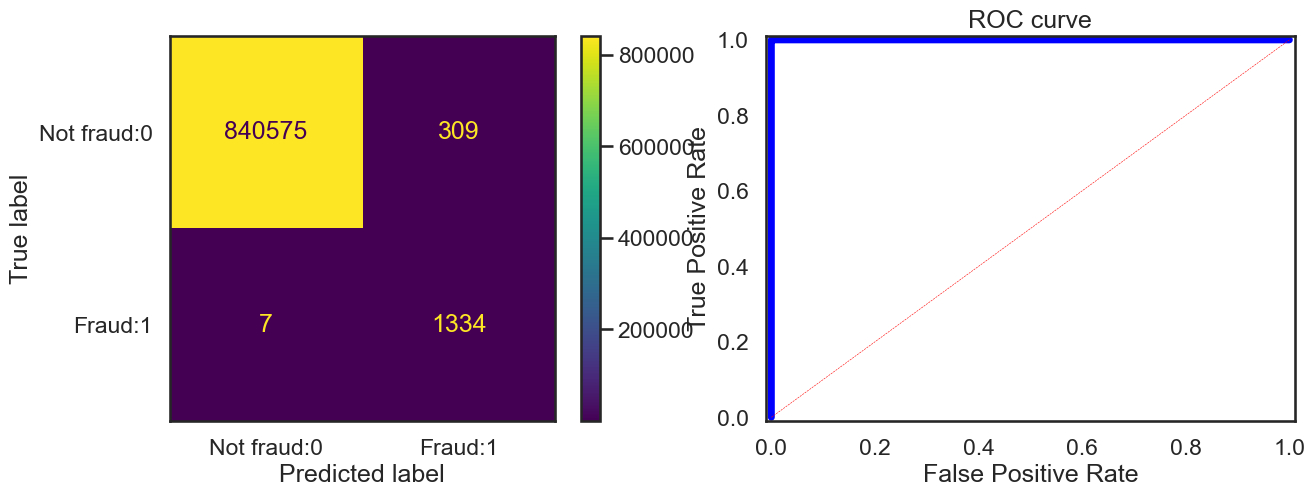

In [106]:
# Credit card transaction is a syntetic financial dataset created using a simulator called PaySim. In this sense, PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.## Final model performance
model_performance_test(y_pred, y_test, y_pred_prob)

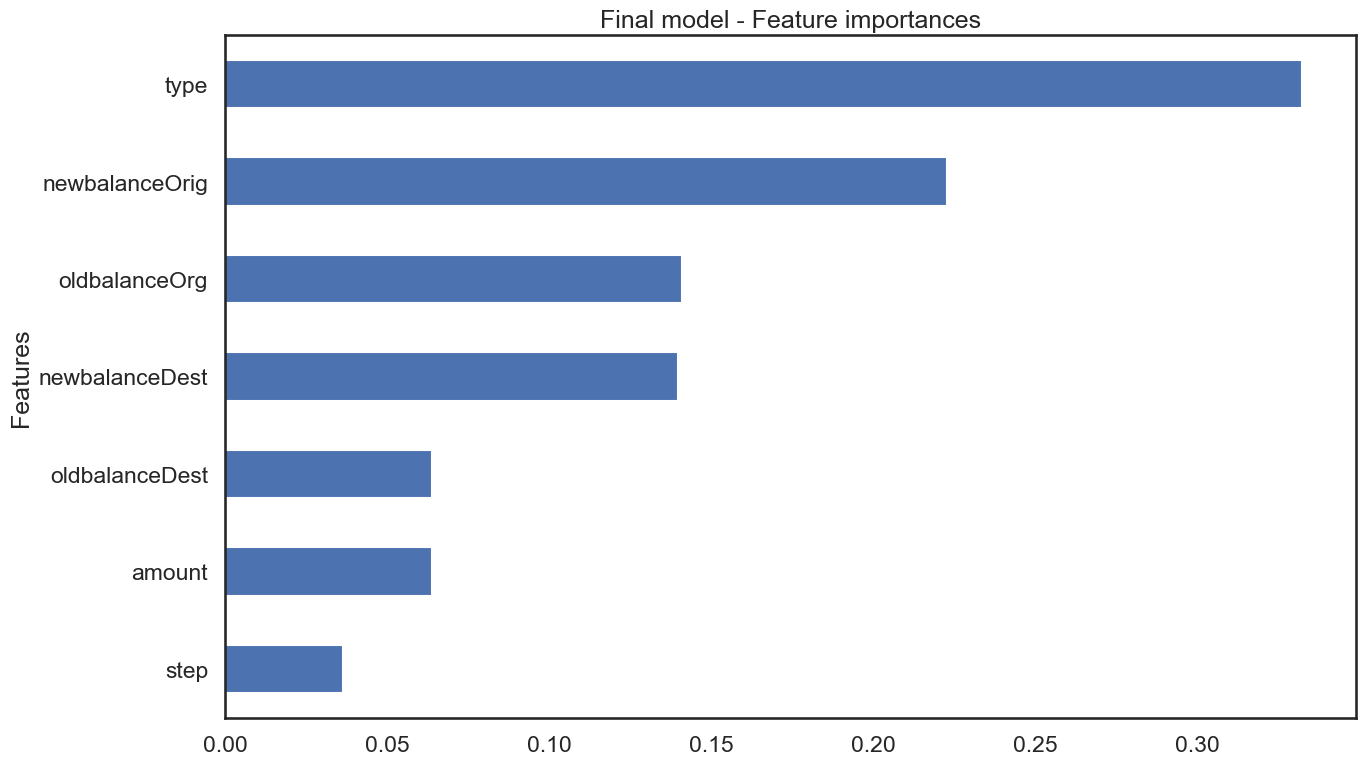

In [107]:
## Final model - Feature importance
feature_importance = pd.Series(final_model.feature_importances_, index = X_train.columns)

# Plot
plt.figure(figsize = (14, 8))
feature_importance.sort_values(ascending= True).plot(kind = 'barh')
plt.ylabel("Features")
plt.title("Final model - Feature importances", fontsize = 18)

plt.tight_layout();

#### **Observations**
- **In general, the model reaches quite good performance with the test set, achieving an Accuracy of 99.9%.**

- By analyzing the confusion matrix, we can see that the model is so good at identifying both classes Not Fraud(840570 out of 840908) and Churn(1305 out of 1317) with 99.95% and 99.08% observations correctly classified respectly.

- Other metrics that show us the so good performance of the model with both classes:

 - ROC-AUC Score: 0.98

 - F1-Score: 0.98

- The variables that contribute most to the XGBoost final model were:

 - Type of transferent
 - New balance account origin
 - Old balance account origin 

- **These variables could be good predictors to detect fraud in credit card transactions.**

### **Save the model - Serialization**

In [108]:
modelpath = "../app/"
with open(f"{modelpath}/fraud_detection_model.pkl", "wb") as file:
    joblib.dump(final_model, file)

### Conclusion

* We have large number of records which are incorrectly flagged as 0.
* Incorrect flagging might have big impact in future if we don't calculate it properly as it might lead to increase in online payment fraud percentage as people relay more on online payment nowadays.
* The amount range usually fraudsters target is aroung 1-4 lakhs which is certainly a large sum.
* Fraudsters focus during cashout and transfer mode type transfer.
* Fraud is less likely/rare to happen during payment mode transfer though people are using online payment more.
* There is not much information taken from oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest and newbalanceDest columns though they had good positive correlation score

### Analysis insights
1. What is the fraud percent that has happened in the overall transaction ?
- Totally there is 8213 fraud transactions happened which constitutes around 0.13% of total transactions happened

2. Under which type of transfer payment type fraud has occurred mostly.
- Fraud has happened only in cashout and transfer type. 0.183 % fraud happened in total cashout mode type and 0.769 % fraud happened in total transfer mode type

3. Were we able to mark the fraud transaction as isFlaggedFraud?
- No. Only 16 records of the 63 lakh records were flagged as fraud which is very less that constitutes to 0.195 % of the total fraud transactions.

4. What is the percentage of incorrect flagged fraud records?
- We have around 8197 records which are incorrectly flagged as 0 which constitutes 99.805 % of total fraud records

5. Were all the isFlaggedFraud records that are marked as fraud is correct?
- Yes. All the 16 transactions that are flagged as fraud is actually fraud transactions

6. At what amount range, fraud has happened?
- The fraud amount transaction ranges between 1.3-3.6 lakh with most occurred in the range 340,000-360,000 (3.4-3.6 lakh).

- Through this project, we demonstrated that it is possible to identify fraudulent transactions in financial transactions data with very high accuracy despite the high-class imbalance. 
### We provide the following recommendations from this Project -  
- Fraud detection in transactions data where transaction amount and balances of the recipient and originator are available can be best performed using tree-based algorithms like Random Forest 
- Using dispersion and scatter plots to visualize the separation between fraud and non-fraud transactions is essential to choose the right features 
- To address the high-class imbalance typical in fraud detection problems, sampling techniques like undersampling, oversampling, SMOTE can be used. However, there are limitations in terms of computation requirements with these approaches, especially when dealing with big data sets. 
- To measure the performance of fraud detection systems, we need to be careful about choosing the right measure. The recall parameter is a good measure as it captures whether a good number of fraudulent transactions are correctly classified or not. We should not rely only on accuracy as it can be misleading.